# Assignment — Automotive Efficiency (Q3)

In this question we were asked to run our implementation of the decision tree for the automotive efficiency problem.

In [ ]:
# === Imports & setup ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Your implementations
from tree.base import DecisionTree
from metrics import rmse, mae

# For comparison
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(42)


We removed the rows which had missing horsepower values.

In [ ]:
# === Read the data ===
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = pd.read_csv(
    url,
    delim_whitespace=True,
    header=None,
    names=["mpg", "cylinders", "displacement", "horsepower", "weight",
           "acceleration", "model year", "origin", "car name"]
)

# === Clean: drop non-predictive column, handle missing horsepower ===
data = data.drop('car name', axis=1)
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data = data.dropna().reset_index(drop=True)

# Features / Target
X = data.drop('mpg', axis=1)
y = data['mpg']

print("Shape after cleaning:", data.shape)
data.head()

C:\Users\aatal\AppData\Local\Temp\ipykernel_3640\2920821028.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


Shape after cleaning: (392, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


We first randomly shuffle the data and then split it into training and testing sets (70% and 30% respectively)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (274, 7)
Test shape: (118, 7)


We then train our decision tree on the training set and evaluate its performance on the testing set.


In [ ]:
# === Train custom Decision Tree ===
custom_tree = DecisionTree(criterion="information_gain", max_depth=5)
custom_tree.fit(X_train, y_train)

# === Predict & evaluate ===
y_pred_custom = custom_tree.predict(X_test)

rmse_custom = rmse(y_pred_custom, y_test)
mae_custom = mae(y_pred_custom, y_test)

print("Custom Decision Tree Results")
print("="*32)
print(f"RMSE: {rmse_custom:.4f}")
print(f"MAE:  {mae_custom:.4f}")

Custom Decision Tree Results
RMSE: 3.1772
MAE:  2.3038


We train `DecisionTreeRegressor(max_depth=5)` and compare metrics on the same test set.


In [ ]:
# === Train sklearn Decision Tree ===
sklearn_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
sklearn_tree.fit(X_train, y_train)

# === Predict & evaluate ===
y_pred_sklearn = sklearn_tree.predict(X_test)

rmse_sklearn = float(np.sqrt(mean_squared_error(y_test, y_pred_sklearn)))
mae_sklearn = float(mean_absolute_error(y_test, y_pred_sklearn))

print("Scikit-learn Decision Tree Results")
print("="*35)
print(f"RMSE: {rmse_sklearn:.4f}")
print(f"MAE:  {mae_sklearn:.4f}")

Scikit-learn Decision Tree Results
RMSE: 3.1751
MAE:  2.2962


In [ ]:
# === Side-by-side comparison ===
print("\nPerformance Comparison:")
print(f"{'Metric':<10} {'Custom Tree':<15} {'Scikit-learn':<15}")
print("-" * 45)
print(f"{'RMSE':<10} {rmse_custom:<15.4f} {rmse_sklearn:<15.4f}")
print(f"{'MAE':<10} {mae_custom:<15.4f} {mae_sklearn:<15.4f}")


Performance Comparison:
Metric     Custom Tree     Scikit-learn   
---------------------------------------------
RMSE       3.1772          3.1751         
MAE        2.3038          2.2962         


We have kept the depth to be constant for both the Skit-learn and Scratch implementations. The RMSE values are close to each other, which shows that our implementation is working correctly.

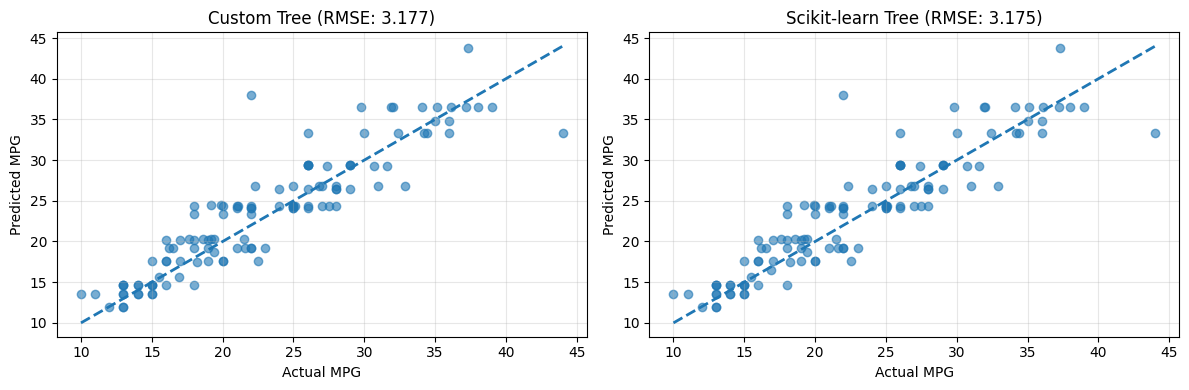

In [ ]:
# === Parity plots ===
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Custom tree
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_custom, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', linewidth=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title(f'Custom Tree (RMSE: {rmse_custom:.3f})')
plt.grid(True, alpha=0.3)

# Sklearn tree
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', linewidth=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title(f'Scikit-learn Tree (RMSE: {rmse_sklearn:.3f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()